### Feature Map 시각화

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# VGG 모델 로드 (pretrained=True 사용)
vgg16 = models.vgg16(pretrained=True).features
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device).eval()
print(vgg16)

/home/jsbae/.local/share/virtualenvs/class_venv-U-MYYWBI/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jsbae/.local/share/virtualenvs/class_venv-U-MYYWBI/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

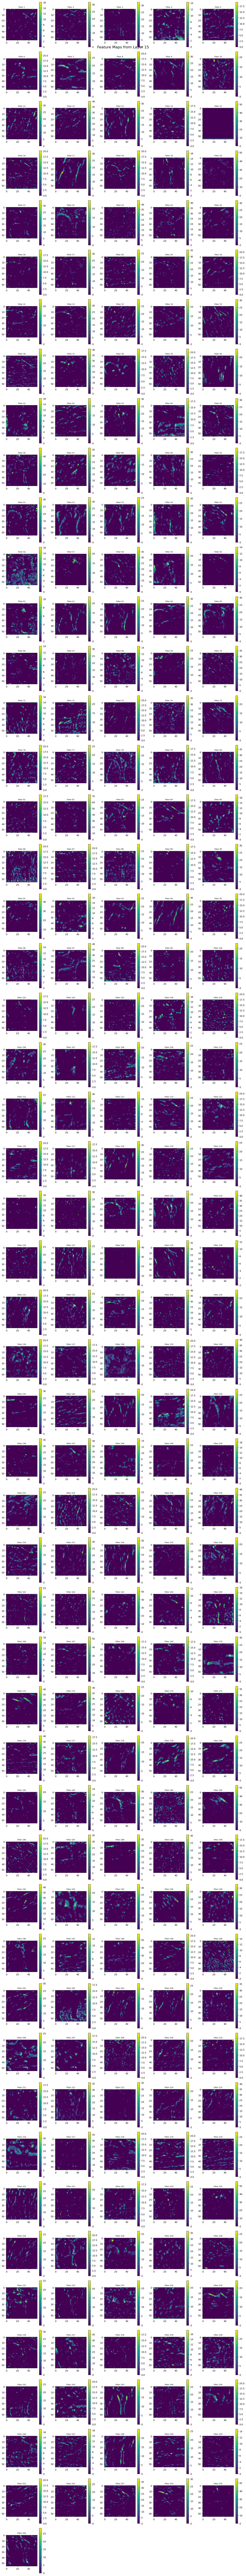

In [ ]:
# 이미지 변환 함수 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 이미지 로드 및 변환
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image.to(device)

# # Feature Map 시각화 함수
# def visualize_feature_map(image_path, layer_idx=0):
#     image = load_image(image_path)
    
#     # 특정 레이어의 출력을 얻기 위해 forward 진행
#     x = image
#     for idx, layer in enumerate(vgg16):
#         x = layer(x)
#         if idx == layer_idx:
#             break
    
#     # Feature Map을 numpy 배열로 변환
#     feature_maps = x.squeeze(0).cpu().detach().numpy()
#     num_maps = feature_maps.shape[0]
    
#     # Feature Map 시각화
#     cols = 5  # 한 줄에 5개씩 배치
#     rows = (num_maps // cols) + (1 if num_maps % cols != 0 else 0)  # 필요한 행 개수 계산
#     fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
#     fig.suptitle(f'Feature Maps from Layer {layer_idx}', fontsize=16)
    
#     for i in range(rows * cols):
#         ax = axes[i // cols, i % cols]
#         if i < num_maps:
#             im = ax.imshow(feature_maps[i], cmap='viridis')  # imshow 반환값 저장
#             ax.set_title(f'Filter {i+1}', fontsize=8)
#             fig.colorbar(im, ax=ax)  # 해당 서브플롯(ax)에 대해 colorbar 추가
#         else:
#             ax.axis('off')  # 빈 서브플롯은 비활성화

#     plt.tight_layout()
#     plt.savefig('without_dropout.png')
#     plt.show()

# # 사용 예시
# visualize_feature_map('./dataset/V1/train_data/00022.png', layer_idx=15)

# Feature Map을 하나로 합쳐 가시화하는 함수
def visualize_combined_feature_map(image_path, layer_idx=0):
    image = load_image(image_path)
    
    # 특정 레이어의 출력을 얻기 위해 forward 진행
    x = image
    for idx, layer in enumerate(vgg16):
        x = layer(x)
        if idx == layer_idx:
            break
    
    # Feature Map을 하나로 합침 (평균 연산)
    combined_feature_map = x.squeeze(0).mean(dim=0).cpu().detach().numpy()
    
    # Feature Map 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(combined_feature_map, cmap='viridis')
    plt.colorbar()
    plt.title(f'Combined Feature Map from Layer {layer_idx}')
    plt.axis('off')
    
    plt.savefig('combined_feature_map.png')
    plt.show()

# 사용 예시
visualize_combined_feature_map('./dataset/V1/train_data/00022.png', layer_idx=30)



In [4]:
vgg = models.vgg16(pretrained=True).features.children()
feature_extractor_with_dropout = nn.Sequential()

for layer in vgg:
    feature_extractor_with_dropout.append(layer)
    if isinstance(layer, nn.ReLU):  # ReLU 활성화 함수 뒤에 Dropout 추가
        feature_extractor_with_dropout.append(nn.Dropout(p=0.5))
feature_extractor_with_dropout.to(device).eval()
print(feature_extractor_with_dropout)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): Dropout(p=0.5, inplace=False)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Dropout(p=0.5, inplace=False)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Dropout(p=0.5, inplace=False)
  (17): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU(inplace=True)
  (19): Dropout(p=0.5, inplace

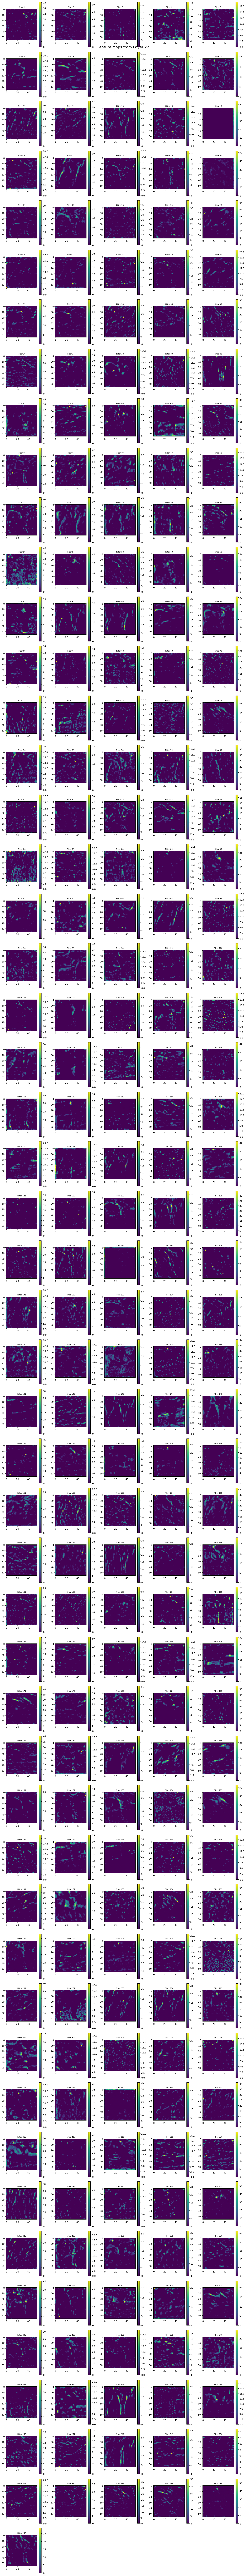

In [5]:
# 이미지 변환 함수 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 이미지 로드 및 변환
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image.to(device)

# Feature Map 시각화 함수
def visualize_feature_map(image_path, layer_idx=0):
    image = load_image(image_path)
    
    # 특정 레이어의 출력을 얻기 위해 forward 진행
    x = image
    for idx, layer in enumerate(feature_extractor_with_dropout):
        x = layer(x)
        if idx == layer_idx:
            break
    
    # Feature Map을 numpy 배열로 변환
    feature_maps = x.squeeze(0).cpu().detach().numpy()
    num_maps = feature_maps.shape[0]
    
    # Feature Map 시각화
    cols = 5  # 한 줄에 5개씩 배치
    rows = (num_maps // cols) + (1 if num_maps % cols != 0 else 0)  # 필요한 행 개수 계산
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    fig.suptitle(f'Feature Maps from Layer {layer_idx}', fontsize=16)
    
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        if i < num_maps:
            im = ax.imshow(feature_maps[i], cmap='viridis')  # imshow 반환값 저장
            ax.set_title(f'Filter {i+1}', fontsize=8)
            fig.colorbar(im, ax=ax)  # 해당 서브플롯(ax)에 대해 colorbar 추가
        else:
            ax.axis('off')  # 빈 서브플롯은 비활성화

    plt.tight_layout()
    plt.savefig('with_dropout.png')
    plt.show()

# 사용 예시
visualize_feature_map('./dataset/V1/train_data/00022.png', layer_idx=22)


In [ ]:
# ResNet 모델 로드 (pretrained=True 사용)
resnet = models.resnet50(pretrained=True)
modules = list(resnet.children())[:-2]  # 마지막 fully connected layer 제거
resnet = torch.nn.Sequential(*modules)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet.to(device).eval()
print(resnet)

In [ ]:
# 이미지 변환 함수 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 이미지 로드 및 변환
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image.to(device)

# Feature Map 시각화 함수
def visualize_feature_map(image_path, layer_idx=0):
    image = load_image(image_path)
    
    # 특정 레이어의 출력을 얻기 위해 forward 진행
    x = image
    for idx, layer in enumerate(resnet):
        x = layer(x)
        if idx == layer_idx:
            break
    
    # Feature Map을 numpy 배열로 변환
    feature_maps = x.squeeze(0).cpu().detach().numpy()
    num_maps = feature_maps.shape[0]
    
    # Feature Map 시각화
    cols = 5  # 한 줄에 5개씩 배치
    rows = (num_maps // cols) + (1 if num_maps % cols != 0 else 0)  # 필요한 행 개수 계산
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
    fig.suptitle(f'Feature Maps from ResNet Layer {layer_idx}', fontsize=16)
    
    # for i in range(rows * cols):
    #     ax = axes[i // cols, i % cols]
    #     if i < num_maps:
    #         ax.imshow(feature_maps[i], cmap='viridis')
    #         ax.set_title(f'Filter {i+1}', fontsize=8)
        # ax.axis('off')
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        if i < num_maps:
            im = ax.imshow(feature_maps[i], cmap='viridis')  # imshow 반환값 저장
            ax.set_title(f'Filter {i+1}', fontsize=8)
            fig.colorbar(im, ax=ax)  # 해당 서브플롯(ax)에 대해 colorbar 추가
        else:
            ax.axis('off')  # 빈 서브플롯은 비활성화
    plt.tight_layout()
    plt.show()

# 사용 예시 (이미지 파일 경로를 입력)
visualize_feature_map('./dataset/V1/train_data/00022.png', layer_idx=1)